In [2]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk

In [4]:
data = sk.datasets.load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
X = data.data
X = sk.preprocessing.scale(X)
y = data.target

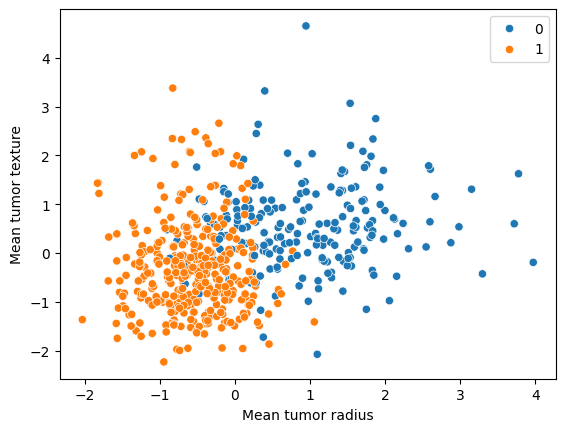

In [7]:
sb.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.xlabel('Mean tumor radius')
plt.ylabel('Mean tumor texture')
plt.show()

In [24]:
alpha = np.arange(1E-32, 1, 0.005)
val_scores = np.zeros((len(alpha), 1)) 

for i in range(len(alpha)):
    model = sk.linear_model.SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = alpha[i])
    score = sk.model_selection.cross_val_score(model, X, y, cv = 5)
    val_scores[i] = score.mean()

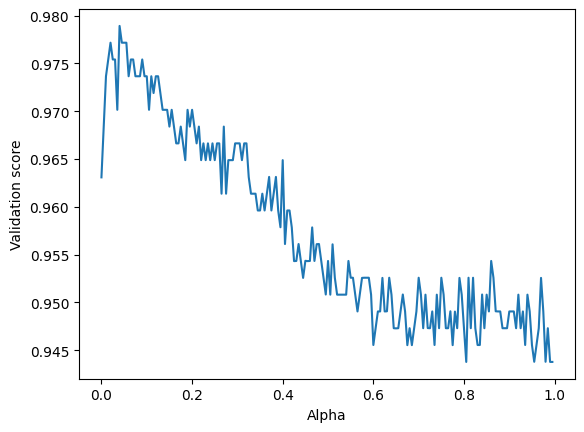

Validation score maximum argument: 0.9789163173420278


In [25]:
plt.plot(alpha, val_scores)
plt.xlabel('Alpha')
plt.ylabel('Validation score')
plt.show()

alpha_index = val_scores.argmax()
print(f'Validation score maximum argument: {val_scores.max()}')

In [27]:
model = sk.linear_model.SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = alpha[alpha_index])
model = model.fit(X,y)
print(f'Training score: {model.score(X,y)}')

Training score: 0.9806678383128296


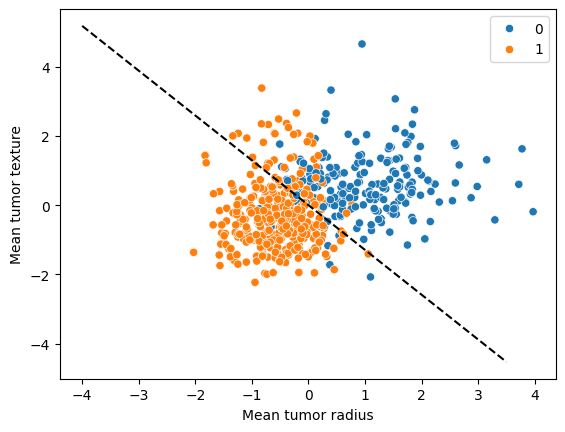

In [35]:
slope = model.coef_[0,1]/-model.coef_[0,0]
x1 = np.arange(-4,4,0.5)
y1 = slope*x1

sb.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.plot(x1, y1, '--k')
plt.xlabel('Mean tumor radius')
plt.ylabel('Mean tumor texture')
plt.show()